## K Means Algorithm ##
-> Unsupervised learning method
<br>
-> Initially have multiple clusters of points (in real life analysis, these usually represnt some quantity like location or price and quantity of a thing)
<br>
-> Start by assigning k random points as means of clusters, then categorise datapoint to it's closest and continuously updating the means depending on the averages of the points contained in the cluster
<br>
-> We repeat the process for multiple iterations and then finally have our clusters
-> With higher number of clusters (and this observation changed with different distributions), the clustering is less accuarate compared to that with lesser number of clusters

In [16]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skd

import math

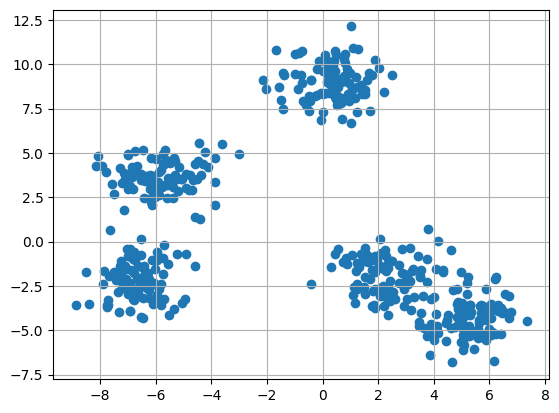

In [17]:
x,y = skd.make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

{0: {'centre': array([0.06919154, 1.78785042]), 'points': []}, 1: {'centre': array([ 1.06183904, -0.87041662]), 'points': []}, 2: {'centre': array([-1.11581855,  0.74488834]), 'points': []}, 3: {'centre': array([-1.33144319, -0.43023013]), 'points': []}, 4: {'centre': array([ 0.47220939, -0.35227962]), 'points': []}}


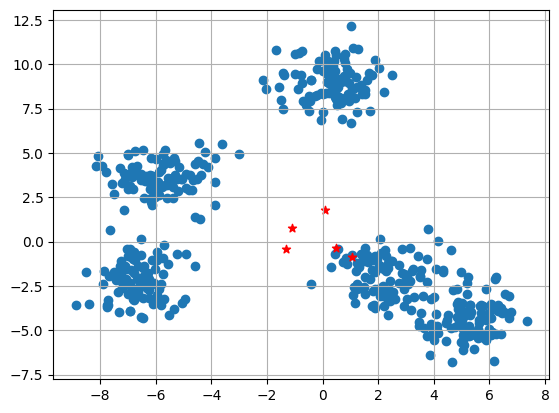

In [18]:
k = 5

clusters = {}
np.random.seed(23)

for idx in range(k):
    centre = 2*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster = {
        'centre' : centre,
        'points' : []
    }
    
    clusters[idx] = cluster
    
print(clusters)

plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
    centre = clusters[i]['centre']
    plt.scatter(centre[0],centre[1],marker = '*',c = 'red')
plt.show()

In [19]:
# def predictClusters(x, clusters):
#     pred = []
#     for i in range(x.shape[0]):
#         dist = []
#         for j in range(k):
#             dist.append(distance(x[i],clusters[j]['centre']))
#         pred.append(np.argmin(dist))
#     return pred 

# def distance(p1,p2):
#     return np.sqrt(np.sum((p1-p2)**2))

# def ClusterAssign(x, clusters):
#     for idx in range(x.shape[0]):
#         dist = []
        
#         curr_x = x[idx]
        
#         for i in range(k):
#             dis = distance(curr_x,clusters[i]['centre'])
#             dist.append(dis)
#         curr_cluster = np.argmin(dist)
#         clusters[curr_cluster]['points'].append(curr_x)
#     return clusters
        
# #Implementing the M-Step
# def ClusterUpdate(x, clusters):
#     for i in range(k):
#         points = np.array(clusters[i]['points'])
#         if points.shape[0] > 0:
#             new_centre = points.mean(axis =0)
#             clusters[i]['centre'] = new_centre
            
#             clusters[i]['points'] = []
#     return clusters  
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

def ClusterAssign(x, clusters):
    for idx in range(x.shape[0]):
        dist = []
        
        curr_x = x[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['centre'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters
        
#Implementing the M-Step
def ClusterUpdate(x, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_centre = points.mean(axis =0)
            clusters[i]['centre'] = new_centre
            
            clusters[i]['points'] = []
    return clusters

def predictClusters(x, clusters):
    pred = []
    for i in range(x.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(x[i],clusters[j]['centre']))
        pred.append(np.argmin(dist))
    return pred   

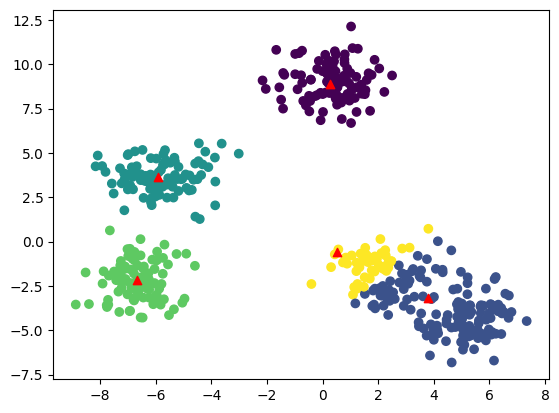

In [20]:
clusters = ClusterAssign(x,clusters)
clusters = ClusterUpdate(x,clusters)
pred = predictClusters(x,clusters)

plt.scatter(x[:,0],x[:,1],c = pred)
for i in clusters:
    centre = clusters[i]['centre']
    plt.scatter(centre[0],centre[1],marker = '^',c = 'red')
plt.show()